In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

datapath = Path() / "data" / "housing" 
housing = pd.read_csv(datapath / "housing.csv")


In [3]:
housing.head(8)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing.describe(include=object)

,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


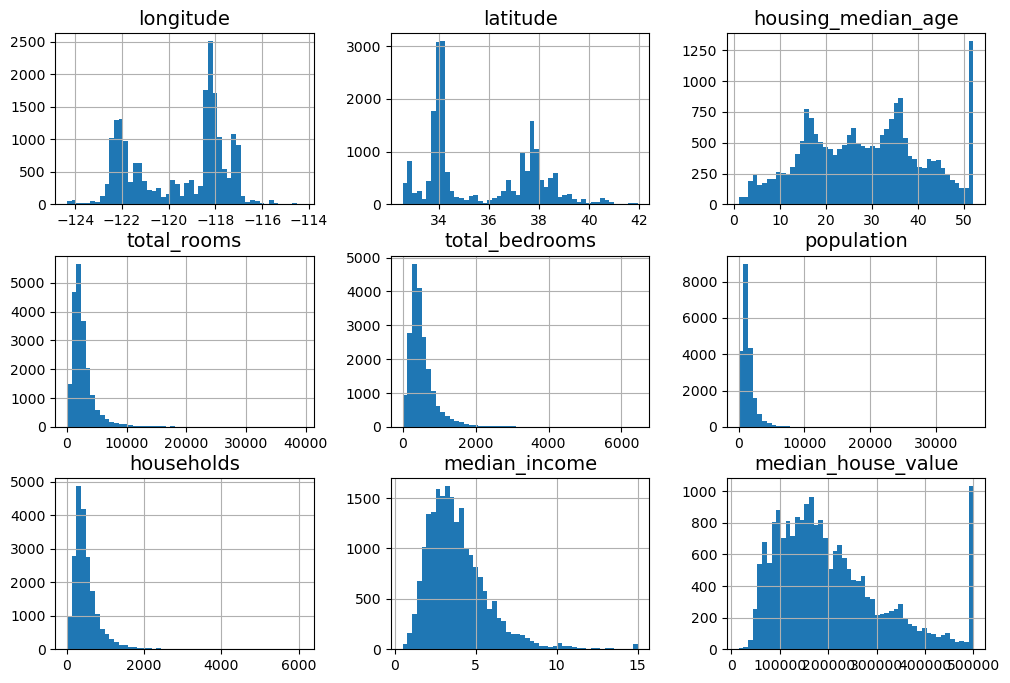

In [8]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

In [9]:
from sklearn.model_selection import train_test_split


In [10]:
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [11]:
housing["income_cat"].value_counts()

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

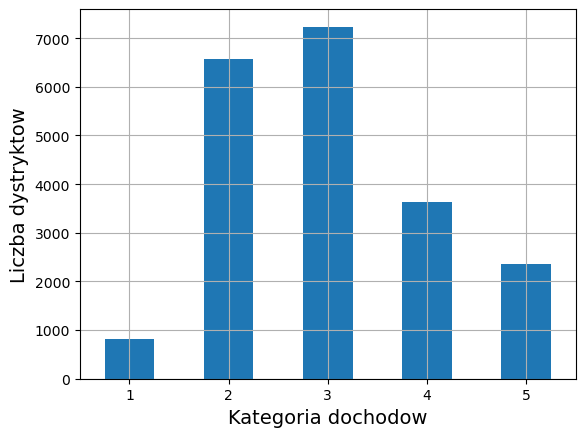

In [12]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Kategoria dochodow")
plt.ylabel("Liczba dystryktow")
plt.show()

In [13]:
df_train_rand_samp, df_test_rand_samp = train_test_split(
    housing, test_size=0.2, random_state=42
)

df_train, df_test = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42
)

In [14]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

compare_samp = pd.DataFrame({
    "Łącznie (%)": income_cat_proportions(housing),
    "Warstwowe (%)": income_cat_proportions(df_test),
    "Losowe (%)": income_cat_proportions(df_test_rand_samp),
}).sort_index()
compare_samp.index.name = "Kategoria dochodów"
compare_samp["Błąd - warstwowe (%)"] = (compare_samp["Warstwowe (%)"] / compare_samp["Łącznie (%)"] - 1)
compare_samp["Błąd - losowe (%)"] = (compare_samp["Losowe (%)"] / compare_samp["Łącznie (%)"] - 1)
(compare_samp * 100).round(2)

,Łącznie (%),Warstwowe (%),Losowe (%),Błąd - warstwowe (%),Błąd - losowe (%)
Kategoria dochodów,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


In [15]:
for set_ in (df_train, df_test):
    set_.drop("income_cat", axis=1, inplace=True)

In [16]:
df_train_eda = df_train.copy()

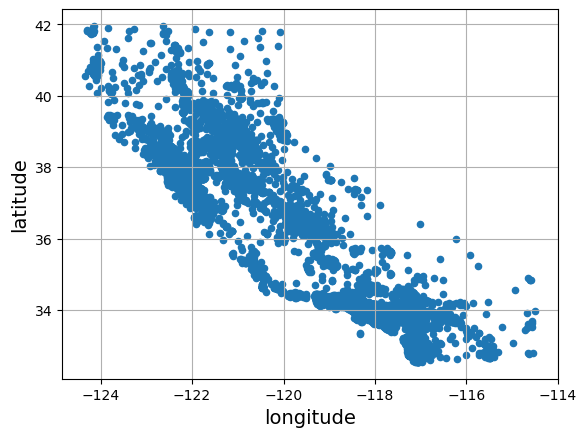

In [17]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

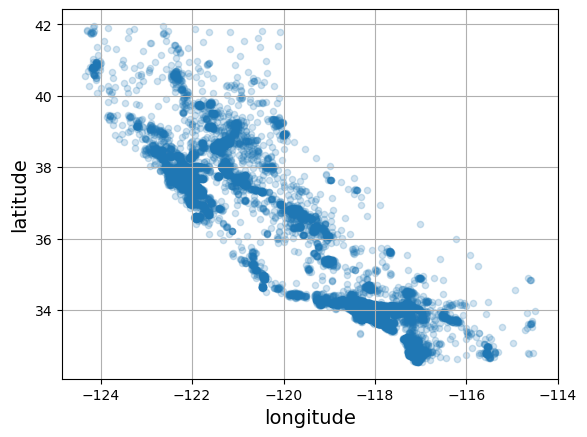

In [18]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

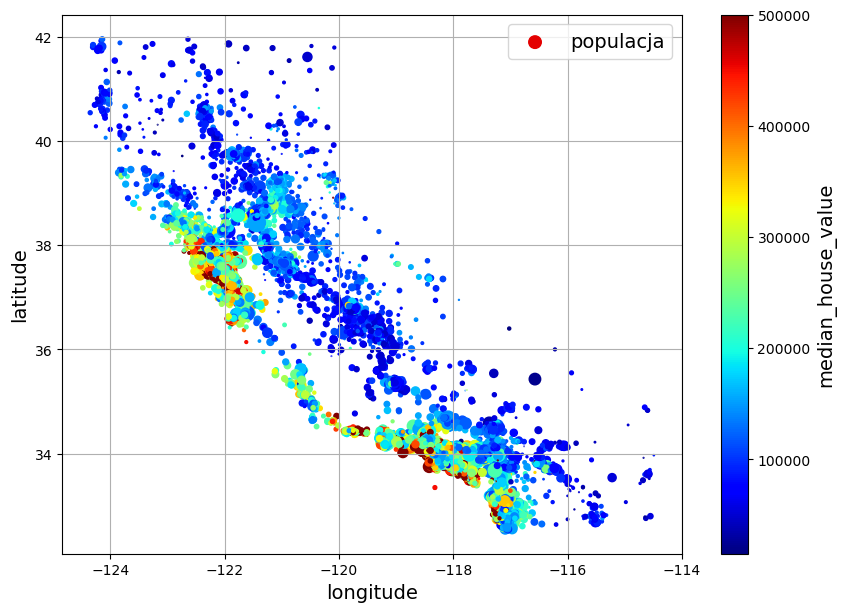

In [19]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True,
s=df_train_eda["population"] / 100, label="populacja",
c="median_house_value", cmap="jet", colorbar=True,
legend=True, sharex=False, figsize=(10, 7))
plt.show()

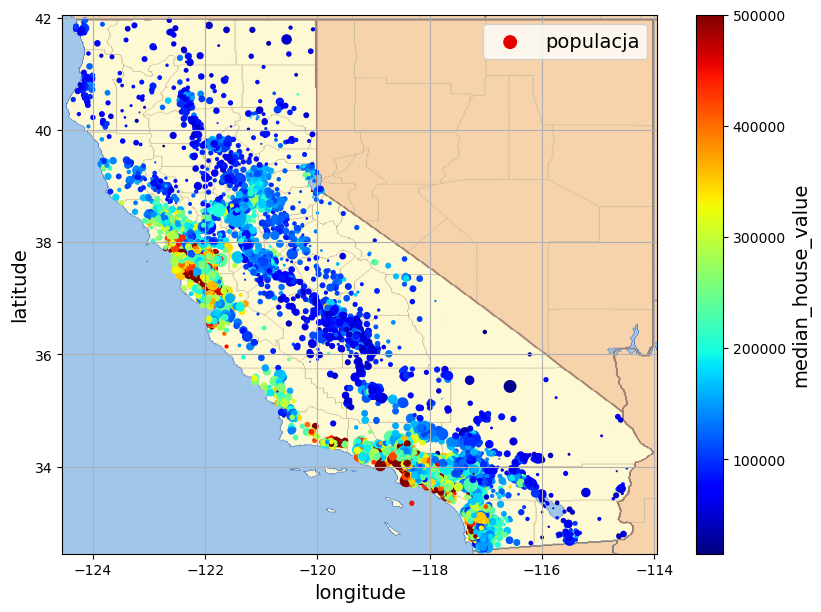

In [20]:
df_train_eda.plot(kind="scatter", x="longitude", y="latitude", grid=True,
s=df_train_eda["population"] / 100, label="populacja",
c="median_house_value", cmap="jet", colorbar=True,
legend=True, sharex=False, figsize=(10, 7))
california_img = plt.imread(datapath / "california.png")
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)
plt.show()

In [21]:
corr_matrix = df_train_eda.select_dtypes(np.number).corr()

In [22]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

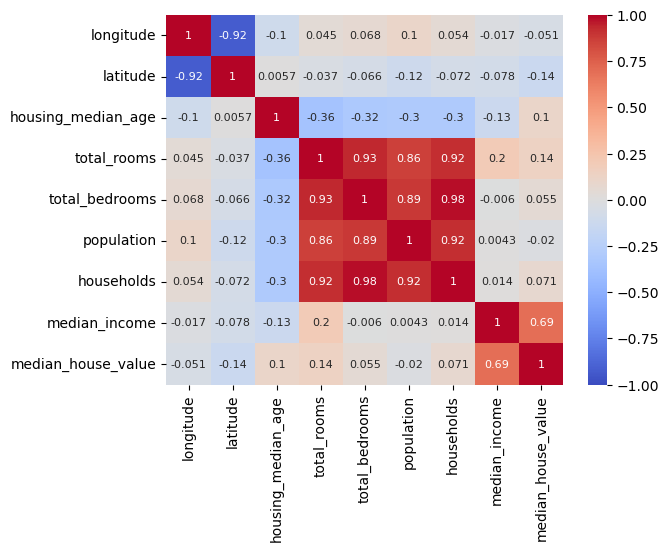

In [23]:
sns.heatmap(corr_matrix, annot=True, annot_kws={"size": 8}, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

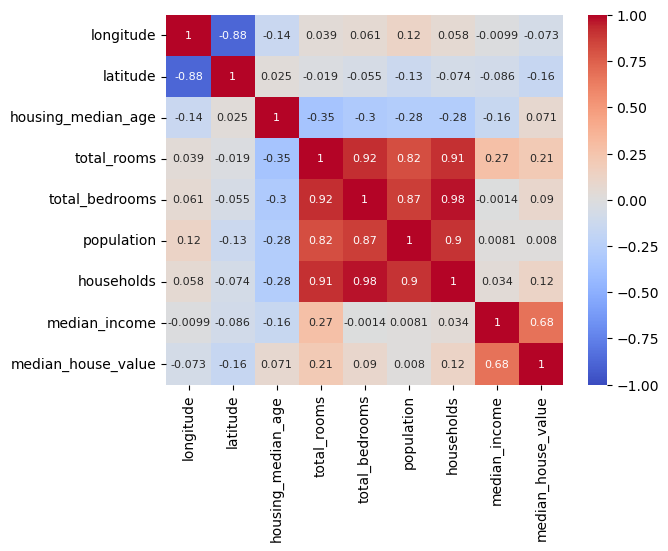

In [24]:
# Spearman correlation
corr_matrix_spearman = df_train_eda.select_dtypes(np.number).corr(method = "spearman")
sns.heatmap(corr_matrix_spearman, annot=True, annot_kws={"size": 8}, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

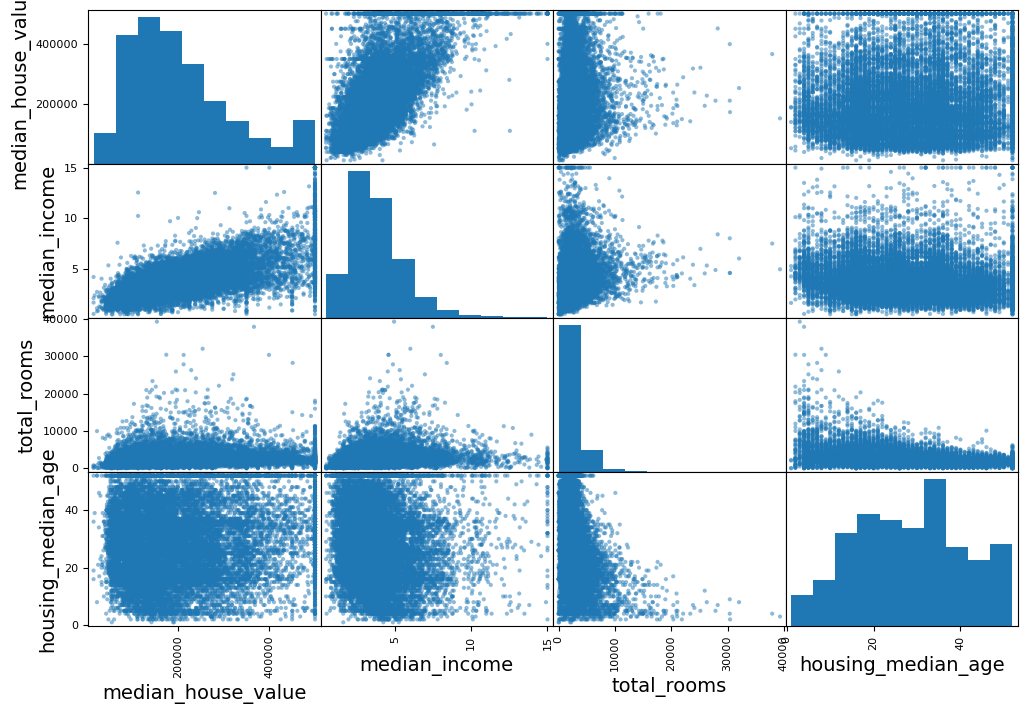

In [25]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(df_train_eda[attributes], figsize=(12, 8))
plt.show()

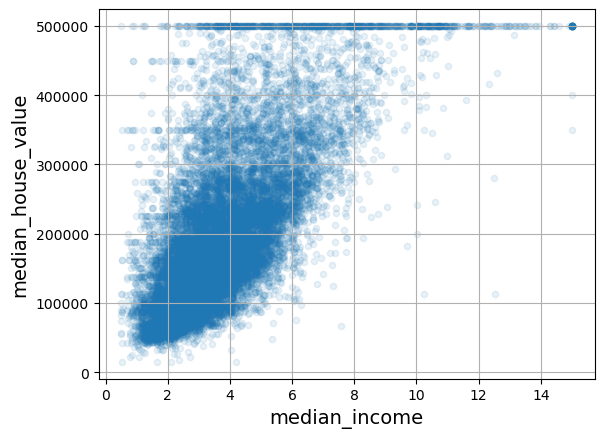

In [26]:
df_train_eda.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1, grid=True)
plt.show()

In [27]:
df_train_eda["pokoje_na_rodzinę"] = df_train_eda["total_rooms"] / df_train_eda["households"]
df_train_eda["współczynnik_sypialni"] = df_train_eda["total_bedrooms"] / df_train_eda["total_rooms"]
df_train_eda["liczba_osób_na_dom"] = df_train_eda["population"] / df_train_eda["households"]

In [28]:
corr_matrix = df_train_eda.select_dtypes(np.number).corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value       1.000000
median_income            0.688380
pokoje_na_rodzinę        0.143663
total_rooms              0.137455
housing_median_age       0.102175
households               0.071426
total_bedrooms           0.054635
population              -0.020153
liczba_osób_na_dom      -0.038224
longitude               -0.050859
latitude                -0.139584
współczynnik_sypialni   -0.256397
Name: median_house_value, dtype: float64

In [29]:
X_train = df_train.drop("median_house_value", axis=1)
y_train = df_train["median_house_value"].copy()

In [30]:
# isna().sum() zwraca nam liczbe wartosci brakujacych w kazdej kolumnie
df_train.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [31]:
df_train.isna().sum().sum()


168

In [32]:
# techniki radzenia sobie z wartosciami NaN
X_train.dropna(subset=["total_bedrooms"], inplace=True) # rozwiazanie 1

X_train.drop("total_bedrooms", axis=1) # rozwiazanie 2

median = X_train["total_bedrooms"].median() # rozwiazanie 3
X_train["total_bedrooms"].fillna(median, inplace=True)

In [33]:
null_rows_idx = X_train.isnull().any(axis=1)
X_train.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [34]:
X_train_option1 = X_train.copy()

X_train_option1.dropna(subset=["total_bedrooms"], inplace=True) # rozwiazanie 1.

X_train_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [35]:
X_train_option2 = X_train.copy()

X_train_option2.drop("total_bedrooms", axis=1) # rozwiazanie 2

X_train_option2.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [36]:
# najmniej destrukcyjne
X_train_option3 = X_train.copy()

median = X_train_option3["total_bedrooms"].median() # rozwiazanie 3
X_train_option3["total_bedrooms"].fillna(median, inplace=True)

X_train_option3.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [37]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

In [51]:
X_train_num = X_train.select_dtypes(include=[np.number])

In [39]:
imputer.fit(X_train_num)

SimpleImputer(strategy='median')

In [40]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.5   ,  434.    , 1167.    ,
        408.5   ,    3.5409])

In [41]:
X_train_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.5   ,  434.    , 1167.    ,
        408.5   ,    3.5409])

In [42]:
X = imputer.transform(X_train_num)
#aplikuje mediany wyliczone przez imputer.fit do wartosci pustych

In [43]:
X

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

In [50]:
X_train_tr = pd.DataFrame(X, columns=X_train_num.columns, index=X_train_num.index)

X_train_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [49]:
X_train_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


In [54]:
imputer = SimpleImputer(strategy="median").set_output(transform="pandas")
X = imputer.fit_transform(X_train_num)

In [55]:
X = imputer.transform(X_train_num)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [56]:
X.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income


In [57]:
X_train_cat = X_train[["ocean_proximity"]]
X_train_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [59]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder().set_output(transform="pandas")
X_train_cat_encoded = ordinal_encoder.fit_transform(X_train_cat)

In [61]:
X_train_cat_encoded.head()

,ocean_proximity
13096,3.0
14973,0.0
3785,1.0
14689,1.0
20507,4.0


In [60]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder_default = OneHotEncoder().set_output(transform="default")
X_train_cat_1hot_default = cat_encoder_default.fit_transform(X_train_cat)
X_train_cat_1hot_default

<16344x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16344 stored elements in Compressed Sparse Row format>

In [63]:
X_train_cat_1hot_default.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [62]:
cat_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
X_train_cat_1hot_df = cat_encoder.fit_transform(X_train_cat)
X_train_cat_1hot_df

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
14207,1.0,0.0,0.0,0.0,0.0
13105,0.0,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,0.0,1.0
19121,1.0,0.0,0.0,0.0,0.0


In [64]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [70]:
sample_df = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(sample_df)


,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [71]:
cat_encoder.transform(sample_df)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0


In [73]:
sample_unknown_df = pd.DataFrame({"ocean_proximity": ["<2H OCEAN", "ISLAND"]})
pd.get_dummies(sample_unknown_df)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [74]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(sample_unknown_df)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


In [75]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [76]:
cat_encoder_default.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [77]:
df_output = pd.DataFrame(X_train_cat_1hot_default.toarray(),
columns=cat_encoder_default.get_feature_names_out(),
index=X_train_cat.index
)

In [78]:
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
14207,1.0,0.0,0.0,0.0,0.0
13105,0.0,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,0.0,1.0
19121,1.0,0.0,0.0,0.0,0.0


In [ ]:
#SKALOWANIE CECH

In [ ]:
X_train_num.describe()